# Stroop Effect Analysis

>In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant's task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example **<font color='red'>RED</font>**, **<font color='blue'>BLUE</font>**. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example **<font color='green'>PINK</font>**, **<font color='brown'>ORANGE</font>**. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Variables

#### Independent Variable

The words condition is the independent variable in this test. There are two words condition being tested: a congruent words condition and an incongruent words condition.

#### Dependent Variable

Performance in Stroop task measured in the time it takes to name the ink colors in equally-sized lists (finish time) in seconds. Higher finish time means lower performance.


## Hypothesis

Suppose $\mu_c$ is the average time it takes to name the ink colors in congruent words condition and $\mu_i$ is the average time it takes to name the ink colors in incongruent words condition, then the null hypothesis, $H_0$, and the alternative hypothesis, $H_A$, is defined as follow:

$$ H_0: \mu_c - \mu_i \ge 0$$
$$H_A: \mu_c - \mu_i < 0$$

## Expectation

The expected result of this test is that performance in incongruent task is statistically significantly lower than in congruent task.

## Test Type

Since the dependent variable in Stroop task, the performance, is measured in a continuous scale and since the independent variable, the words conditions, consists of two categorical matched pairs, then it is appropriate to conduct a repeated measures t-test on sample differences. This test assume that the finish time differences is approximately normally distributed. 


## Dataset

A random sample (*N*=24) of test result was collected from self-submitted online Interactive Stroop Effect test. Below is the dataset that contains paired performance results of congruent and incongruent task and the difference between each pair for each participant in the sample 

In [47]:
from IPython.core.display import display, HTML
import scipy.stats as st
import stroop as s

data = s.loadDataSet()
display(data)

,Congruent,Incongruent,Differences
1,12.079,19.278,-7.199
2,16.791,18.741,-1.950
3,9.564,21.214,-11.650
4,8.630,15.687,-7.057
5,14.669,22.803,-8.134
6,12.238,20.878,-8.640
7,14.692,24.572,-9.880
8,8.987,17.394,-8.407
9,9.401,20.762,-11.361
10,14.480,26.282,-11.802


## Descriptive Analysis

Table below shows statistics of each conditions:

In [48]:
stat = data.describe()
display(stat)

,Congruent,Incongruent,Differences
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


Notice that the mean finish time for congruent words is lower than it is for incongruent words. However, incongruent words finish time is more spread out. 

Below is a scatter plot showing correlation between the two words conditions and it appears that they do not have a high correlation (*r* = .352), thus two dependent samples t-test is appropriate to test the hypothesis.

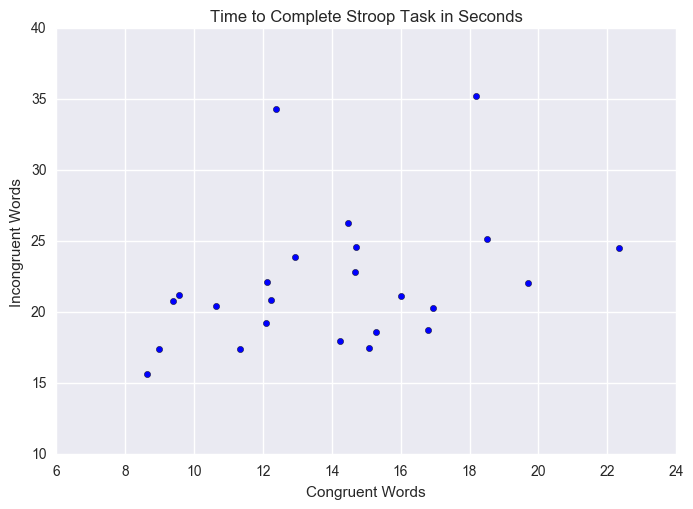

Pearson's r = 0.351819527232


In [49]:
s.scatter(data.Congruent, data.Incongruent)

Histogram of finish time differences shows that the distribution of sample differences is positively skewed. However, its skewness and kurtosis values are still within the allowable range of approximate normality of distribution to conduct a t-test (i.e. skew < |2.0| and kurtosis < |9.0|, Posten, 1984). Thus, assumptions to run this test is satisfied. 

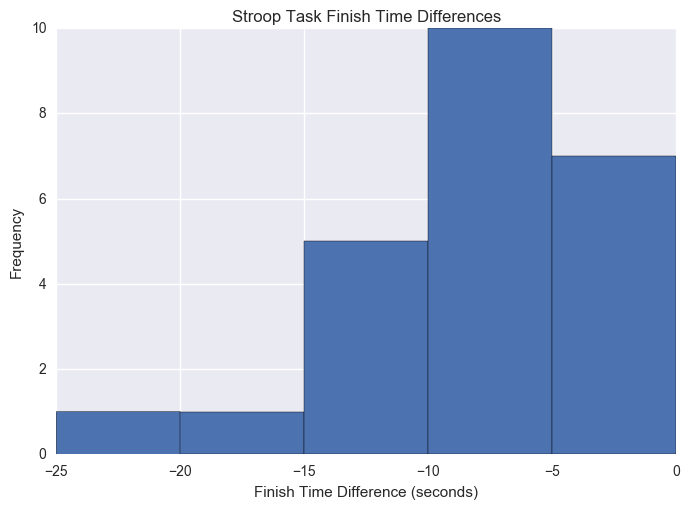

Skewness = -1.0049347118
Kurtosis = 1.13395878153


In [50]:
s.hist(data.Differences)

## t-Test on Sample Differences

Running a negative one-tailed t-test on sample differences, gives the following values:

In [51]:
cohens_d, r_squared, result = s.ttest(data.Differences,.001,tail=1,direction=-1)
display(result)

,mean,std,df,t,t_critical,p,type
t-test,-7.96479166667,4.86482691036,23,-8.02070694411,-3.4849643748,2.05150029286e-08,"one-tailed, neg"


These values show that *t* is less than $t_{critical}$, with a probability of getting *t* by chance is less than .001. Therefore, we reject the null hypothesis, and the alternative hypothesis is accepted. We conclude that mean performance in Stroop task is statistically significantly lower in incongruent than in congruent words condition. This result match the expected result mentioned above.

Cohen's *d* calculation below indicates that the mean of sample differences has a meaningfully large effect size, while the coefficient of determination and 99.9% confidence interval on mean sample difference give a sign that alternative explanation for having the above result can be ruled out.

In [52]:
print ("Cohen's d = " + str(cohens_d))
print ("r_squared = " + str(r_squared))
print "99.9% CI = " + str(s.ci(data.Differences,.999))

Cohen's d = -1.63721994912
r_squared = 0.736636416145
99.9% CI = [-11.706152967972571, -4.2234303653607599]


## Conclusion

To test the hypothesis that the mean finish time in incongruent words condition (*M* = 14.051, *SD* = 3.559) was higher than the mean finish time in congruent words condition (*M* = 14.051, *SD* =3.559), a negative one-tailed t-test was conducted at .001 significant level. A prior examination of linear correlation between the two conditions was conducted, giving an estimated correlation coefficient of .352. Another prior examination of finish time differences assume the normality of sample differences with the skew and kurtosis level estimated at -1.00 and 1.13 respectively. The null hypothesis of mean finish time differences between congruent and incongruent condition is greater than or equal to zero is rejected; *t*(23) = -8.021, *p* < .001. Thus, Stroop task performance in incongruent words condition was statistically significantly lower than in congruent words condition. Cohen's d was estimated at -1.64, meanwhile $r^{2}$ was estimated at .74. The 99.9% confidence interval of mean differences; 99.9% *CI* = (-11.71, -4.22)

## Further Research And Similar Application

John Riddley Stroop, the man who discovered the occurrence of Stroop effect in 1930s, explained the occurrence of the Stroop effect as a result of two conflicting information received by the brain that cause people to struggle to name the colors of incongruent words. The article "The Stroop effect - Is your mind playing tricks on you?" describes that Stroop developed two experimental theories to explain this occurrence namely the Speed of Processing Theory and the Selective Attention Theory.

In the Speed of Processing Theory Stroop showed that interference occurs because people can read words a lot quicker than naming the color of the word, and that the later exercise is more complex than the first. In the Selective Attention Theory, Stroop presented that interference occurs because naming the actual color of the word requires more attention than reading the words.

Stroop effect is mentioned and being referenced in many data visualization studies and articles. The task is often used to show how visualization can send mixed information to the brain and mask the most important information that we tried to convey. Thus, through a good understanding of this phenomenon, we hope to build more effective data visualization. 



## References:

1. "Dependent T-Test using SPSS Statistics." Dependent T-Test in SPSS Statistics - The procedure for running the test, generating the output and understanding the output using a relevant example | Laerd Statistics. N.p., n.d. Web. 06 Apr. 2017.

2. Cohen, J. (1992). A power primer. *Psychological Bulletin*,112, 155-159.

3. H. (2014, March 21). Paired Samples t-test: Writing-Up Results. Retrieved from https://www.youtube.com/watch?annotation_id=annotation_759518491&feature=iv&src_vid=p2r9NHam4vg&v=LPOEdtw7Sjo

4. H. (2014, March 21). Paired Samples t-test: Writing-Up Results (Part 2). Retrieved from https://www.youtube.com/watch?v=p2r9NHam4vg

5. The Stroop effect - The Stroop effect - Is your mind playing tricks on you? (n.d.). Retrieved from https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655


